In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/dont-overfit-ii/train.csv
/kaggle/input/dont-overfit-ii/test.csv
/kaggle/input/dont-overfit-ii/sample_submission.csv


In [2]:
feed = pd.read_csv('/kaggle/input/dont-overfit-ii/train.csv')

In [3]:
feed.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.268000,-0.098064,0.001208,0.090680,-0.122248,0.011500,-0.116624,0.006932,0.100988,...,0.013052,0.007500,0.000452,0.060276,-0.090308,-0.040728,-0.002132,-0.012540,-0.039904,0.073236
std,72.312977,0.443806,0.996063,0.955117,0.968065,0.933001,0.945662,1.081705,1.014091,1.028042,...,1.027845,1.048169,1.026398,1.048744,1.008657,1.051273,1.065524,0.958744,0.948251,0.924989
min,0.000000,0.000000,-3.181000,-3.041000,-2.967000,-2.898000,-2.837000,-3.831000,-2.873000,-2.489000,...,-2.824000,-2.971000,-3.592000,-3.071000,-2.621000,-3.013000,-3.275000,-2.665000,-3.006000,-2.471000
25%,62.250000,0.000000,-0.756250,-0.624750,-0.515750,-0.695500,-0.678000,-0.758500,-0.646250,-0.589000,...,-0.764000,-0.729250,-0.699750,-0.589000,-0.701000,-0.696750,-0.555750,-0.677500,-0.719750,-0.559000
50%,124.500000,0.000000,-0.064500,-0.008000,0.067500,-0.090000,0.028000,-0.073500,-0.076500,0.104500,...,0.017500,0.053000,0.029500,0.042500,-0.102000,-0.057000,0.094500,-0.025500,-0.027500,0.160500
75%,186.750000,1.000000,0.647750,0.493250,0.716000,0.436250,0.625250,0.554250,0.676500,0.717000,...,0.690500,0.665000,0.670750,0.713250,0.532250,0.727000,0.590000,0.671000,0.717000,0.711000
max,249.000000,1.000000,2.347000,3.138000,2.609000,2.590000,2.413000,2.687000,2.793000,3.766000,...,2.773000,2.701000,3.193000,4.280000,2.716000,3.074000,2.626000,2.388000,2.730000,3.401000


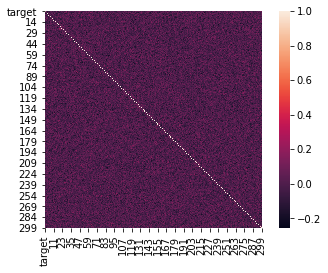

In [4]:
from matplotlib import pyplot as plt
import seaborn as sb
corr = feed.drop('id',axis = 1).corr()
sb.heatmap(corr,square = True)
plt.show()

In [5]:
df_x = feed.drop(['id','target'],axis=1)
df_y = feed[['target']]
df_x.describe()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,-0.098064,0.001208,0.090680,-0.122248,0.011500,-0.116624,0.006932,0.100988,-0.044960,0.007768,...,0.013052,0.007500,0.000452,0.060276,-0.090308,-0.040728,-0.002132,-0.012540,-0.039904,0.073236
std,0.996063,0.955117,0.968065,0.933001,0.945662,1.081705,1.014091,1.028042,0.893491,1.010694,...,1.027845,1.048169,1.026398,1.048744,1.008657,1.051273,1.065524,0.958744,0.948251,0.924989
min,-3.181000,-3.041000,-2.967000,-2.898000,-2.837000,-3.831000,-2.873000,-2.489000,-2.346000,-2.753000,...,-2.824000,-2.971000,-3.592000,-3.071000,-2.621000,-3.013000,-3.275000,-2.665000,-3.006000,-2.471000
25%,-0.756250,-0.624750,-0.515750,-0.695500,-0.678000,-0.758500,-0.646250,-0.589000,-0.563000,-0.715500,...,-0.764000,-0.729250,-0.699750,-0.589000,-0.701000,-0.696750,-0.555750,-0.677500,-0.719750,-0.559000
50%,-0.064500,-0.008000,0.067500,-0.090000,0.028000,-0.073500,-0.076500,0.104500,-0.018500,0.003000,...,0.017500,0.053000,0.029500,0.042500,-0.102000,-0.057000,0.094500,-0.025500,-0.027500,0.160500
75%,0.647750,0.493250,0.716000,0.436250,0.625250,0.554250,0.676500,0.717000,0.544750,0.709500,...,0.690500,0.665000,0.670750,0.713250,0.532250,0.727000,0.590000,0.671000,0.717000,0.711000
max,2.347000,3.138000,2.609000,2.590000,2.413000,2.687000,2.793000,3.766000,1.990000,2.602000,...,2.773000,2.701000,3.193000,4.280000,2.716000,3.074000,2.626000,2.388000,2.730000,3.401000


In [6]:
df_y.describe()

,target
count,250.000000
mean,0.268000
std,0.443806
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import *
from sklearn.preprocessing import PolynomialFeatures

In [8]:
ac={}

for j in range(50):
    x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size = .1,random_state = j)
    
    gauss = GaussianNB().fit(x_train,y_train)
    prediction = gauss.predict(x_test)
    y_test['output'] = prediction
    accuracy = 0
    y_test['equal'] = np.where(y_test['target']==y_test['output'],1,-1)
    for i in y_test.equal:
        accuracy +=i
    if j==0:
        ac['gauss'] = accuracy
    else:
        ac['gauss'] += accuracy

    dt = DecisionTreeRegressor().fit(x_train,y_train)
    prediction = dt.predict(x_test)
    y_test['output'] = prediction
    accuracy = 0
    y_test['equal'] = np.where(y_test['target']==y_test['output'],1,-1)
    for i in y_test.equal:
        accuracy +=i
    if j==0:
        ac['dt'] = accuracy
    else:
        ac['dt'] += accuracy

    lg = LogisticRegression().fit(x_train,y_train)
    prediction = lg.predict(x_test)
    y_test['output'] = prediction
    accuracy = 0
    y_test['equal'] = np.where(y_test['target']==y_test['output'],1,-1)
    for i in y_test.equal:
        accuracy +=i
    if j==0:
        ac['lg'] = accuracy
    else:
        ac['lg'] += accuracy

    bnb = BernoulliNB().fit(x_train,y_train)
    prediction = bnb.predict(x_test)
    y_test['output'] = prediction
    accuracy = 0
    y_test['equal'] = np.where(y_test['target']==y_test['output'],1,-1)
    for i in y_test.equal:
        accuracy +=i
    if j==0:
        ac['bnb'] = accuracy
    else:
        ac['bnb'] += accuracy

    lsvm = LinearSVC().fit(x_train,y_train)
    prediction = lsvm.predict(x_test)
    y_test['output'] = prediction
    accuracy = 0
    y_test['equal'] = np.where(y_test['target']==y_test['output'],1,-1)
    for i in y_test.equal:
        accuracy +=i
    if j==0:
        ac['lsvm'] = accuracy
    else:
        ac['lsvm'] += accuracy    
        
    svm1 = SVC(degree = 2).fit(x_train,y_train)
    prediction = svm1.predict(x_test)
    y_test['output'] = prediction
    accuracy = 0
    y_test['equal'] = np.where(y_test['target']==y_test['output'],1,-1)
    for i in y_test.equal:
        accuracy +=i
    if j==0:
        ac['svm1'] = accuracy
    else:
        ac['svm1'] += accuracy

/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while

In [9]:
p_ac={}
poly = PolynomialFeatures(degree=2)

for j in range(50):
    x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size = .1,random_state = j)
    x_train = poly.fit_transform(x_train)
    x_test = poly.fit_transform(x_test)
    
    gauss = GaussianNB().fit(x_train,y_train)
    prediction = gauss.predict(x_test)
    y_test['output'] = prediction
    accuracy = 0
    y_test['equal'] = np.where(y_test['target']==y_test['output'],1,-1)
    for i in y_test.equal:
        accuracy +=i
    if j==0:
        p_ac['gauss'] = accuracy
    else:
        p_ac['gauss'] += accuracy

    dt = DecisionTreeRegressor().fit(x_train,y_train)
    prediction = dt.predict(x_test)
    y_test['output'] = prediction
    accuracy = 0
    y_test['equal'] = np.where(y_test['target']==y_test['output'],1,-1)
    for i in y_test.equal:
        accuracy +=i
    if j==0:
        p_ac['dt'] = accuracy
    else:
        p_ac['dt'] += accuracy

    lg = LogisticRegression().fit(x_train,y_train)
    prediction = lg.predict(x_test)
    y_test['output'] = prediction
    accuracy = 0
    y_test['equal'] = np.where(y_test['target']==y_test['output'],1,-1)
    for i in y_test.equal:
        accuracy +=i
    if j==0:
        p_ac['lg'] = accuracy
    else:
        p_ac['lg'] += accuracy

    bnb = BernoulliNB().fit(x_train,y_train)
    prediction = bnb.predict(x_test)
    y_test['output'] = prediction
    accuracy = 0
    y_test['equal'] = np.where(y_test['target']==y_test['output'],1,-1)
    for i in y_test.equal:
        accuracy +=i
    if j==0:
        p_ac['bnb'] = accuracy
    else:
        p_ac['bnb'] += accuracy

    lsvm = LinearSVC().fit(x_train,y_train)
    prediction = lsvm.predict(x_test)
    y_test['output'] = prediction
    accuracy = 0
    y_test['equal'] = np.where(y_test['target']==y_test['output'],1,-1)
    for i in y_test.equal:
        accuracy +=i
    if j==0:
        p_ac['lsvm'] = accuracy
    else:
        p_ac['lsvm'] += accuracy    
        
    svm1 = SVC(degree = 2).fit(x_train,y_train)
    prediction = svm1.predict(x_test)
    y_test['output'] = prediction
    accuracy = 0
    y_test['equal'] = np.where(y_test['target']==y_test['output'],1,-1)
    for i in y_test.equal:
        accuracy +=i
    if j==0:
        p_ac['svm1'] = accuracy
    else:
        p_ac['svm1'] += accuracy

/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [10]:
print(ac)
print(p_ac)

{'gauss': 596, 'dt': 308, 'lg': 580, 'bnb': 478, 'lsvm': 378, 'svm1': 598}
{'gauss': 472, 'dt': 304, 'lg': 598, 'bnb': 598, 'lsvm': 598, 'svm1': 598}


So we select 3 models gauss lsvm(deg = 2) and bernaulli

In [11]:
test = pd.read_csv('/kaggle/input/dont-overfit-ii/test.csv')
test.describe()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
count,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,...,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000
mean,10124.500000,0.010933,-0.005470,0.003176,-0.000584,-0.011377,0.001225,0.008716,-0.003512,-0.005035,...,0.002145,0.004692,0.004862,-0.002706,0.004469,-0.003974,-0.003001,-0.005502,0.011342,0.004954
std,5701.478244,0.997062,1.002163,1.001684,0.992821,0.997261,1.002442,1.003023,1.004868,0.998808,...,1.000769,0.999980,0.998581,0.993671,0.996648,1.008269,1.002226,0.996583,1.003967,0.998843
min,250.000000,-4.109000,-4.613000,-3.749000,-3.685000,-3.711000,-3.911000,-4.863000,-3.879000,-4.051000,...,-4.444000,-3.879000,-3.919000,-3.632000,-3.783000,-3.950000,-4.052000,-3.695000,-3.760000,-3.740000
25%,5187.250000,-0.667000,-0.673000,-0.669000,-0.673750,-0.678750,-0.683750,-0.670000,-0.674000,-0.691000,...,-0.676000,-0.668000,-0.680000,-0.680000,-0.670000,-0.686000,-0.681000,-0.683000,-0.675750,-0.667000
50%,10124.500000,0.017000,-0.006000,-0.000000,-0.004500,-0.013000,0.000000,0.014000,-0.003000,-0.010000,...,0.004000,0.006000,0.005000,-0.006000,0.003000,-0.001000,0.004000,-0.016000,0.009500,0.009500
75%,15061.750000,0.689000,0.674000,0.675000,0.660000,0.661000,0.676000,0.694750,0.670000,0.667000,...,0.681000,0.677000,0.684750,0.665000,0.682750,0.675750,0.668000,0.666750,0.692000,0.676000
max,19999.000000,3.775000,3.725000,3.922000,3.969000,3.806000,3.744000,3.733000,4.199000,3.475000,...,4.072000,3.911000,3.580000,3.823000,3.643000,5.042000,3.798000,3.779000,4.190000,3.796000


In [12]:
output= test[['id']]
test = test.drop('id',axis = 1)

In [13]:
poly_df_x = poly.fit_transform(df_x)

gauss = GaussianNB().fit(df_x,df_y)
prediction = gauss.predict(test)
output['t1'] = prediction

svm1 = SVC(degree = 2).fit(df_x,df_y)
prediction = svm1.predict(test)
output['t2'] = prediction

log = LogisticRegression().fit(df_x,df_y)
prediction = log.predict(test)
output['t3'] = prediction

output['target'] = output['t1']+output['t2']+output['t3']+1
output['target'] = output['target']//3

output = output[['id','target']]
output.describe()


/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,id,target
count,19750.000000,19750.000000
mean,10124.500000,0.093367
std,5701.478244,0.290954
min,250.000000,0.000000
25%,5187.250000,0.000000
50%,10124.500000,0.000000
75%,15061.750000,0.000000
max,19999.000000,1.000000


In [14]:
output.to_csv('Submission.csv',index = False)